In [4]:
from ctc_objectives import ctc_loss
import numpy as np
import jax

import os
os.environ["CUDA_VISIBLE_DEVICES"] = ""  # Replace "0" with the index of the GPU you want to use (e.g., "0" for the first GPU).

In [5]:
bs = 3
#inputs = np.random.randn(bs, 30, 8)
weights = np.random.randn(8, 15)
#grad_to_match = np.random.randn(8,15)
grad_to_match = np.zeros((8,15))

In [6]:
def meta_loss_fn(input, grad_to_match):
    # meta_loss function
    # compute MSE between gradient against a given gradient

    ctc_loss_local = lambda x,w: ctc_loss( x @ w,logitpaddings=np.random.rand(bs, 30),
        labels=np.random.randint(0, 10, (bs, 3)),
        labelpaddings=np.random.rand(bs, 4)) [0].sum() 

    loss, dL_dw = jax.value_and_grad(ctc_loss_local, 1)(input, weights)
    #print('ctc loss:',loss)
    return ((dL_dw-grad_to_match)**2).mean()


inp_guess = np.random.randn(bs,30,8)
loss_history = []
for i in range(20):
    meta_loss, inp_gradient = jax.value_and_grad(meta_loss_fn,0)(inp_guess, grad_to_match)
    loss_history.append(meta_loss)
    inp_guess = inp_guess - 0.5 * inp_gradient

2023-10-27 14:10:55.173589: E external/xla/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


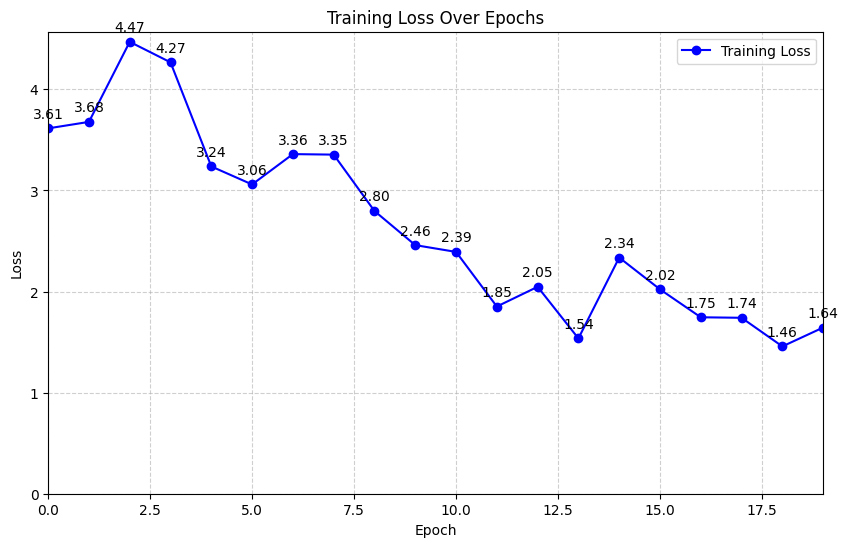

In [7]:
plot_loss_over_epochs(list(range(20)), loss_history, save_path='loss_plot.png')

In [2]:
import matplotlib.pyplot as plt

def plot_loss_over_epochs(epochs, losses, save_path=None):
    """
    Plots loss values over epochs.

    Args:
        epochs (list): List of epoch numbers.
        losses (list): List of loss values corresponding to each epoch.
        save_path (str, optional): If provided, saves the plot to the specified path.

    Returns:
        None
    """
    # Create a plot
    plt.figure(figsize=(10, 6))

    # Plot the loss values
    plt.plot(epochs, losses, marker='o', linestyle='-', color='b', label='Training Loss')

    # Add labels and title
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')

    # Customize the grid and legend
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='upper right')

    # Customize the x-axis and y-axis limits
    plt.xlim(min(epochs), max(epochs))
    plt.ylim(0, max(losses) + 0.1)

    # Add text annotations for key points
    for i, j in zip(epochs, losses):
        plt.annotate(f'{j:.2f}', xy=(i, j), xytext=(i, j + 0.1), ha='center')

    # Save the plot as an image (optional)
    if save_path:
        plt.savefig(save_path)

    # Display the plot
    plt.show()


